# Implementing a Convolutional Neural Network with Keras for MNIST Handwritten Digits Classification

In [24]:
import keras
from keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

### Read and Split Data into Training and Test Set

In [3]:
# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Check an Image from the Dataset

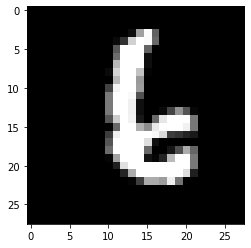

Digit : 0


In [5]:
ind = 7434
sample_image = X_train[ind] 
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('Digit :',np.argmax(y_train[ind]))


### Preprocess Input Images

In [6]:
# Compare with MLP
#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[0,:].shape

(28, 28, 1)

In [10]:
y_train.shape

(60000, 10)

### Build the CNN Model with Keras

In [11]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Summary of the CNN Model

In [12]:
# parameters = [i × (f×f) × o] + o
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

### Train the CNN

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=50, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 205s 3ms/step - loss: 0.1235 - accuracy: 0.9607 - val_loss: 0.0546 - val_accuracy: 0.9842
Epoch 2/5
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0248 - val_accuracy: 0.9921
Epoch 3/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0302 - val_accuracy: 0.9912
Epoch 4/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0263 - accuracy: 0.9925 - val_loss: 0.0283 - val_accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0348 - val_accuracy: 0.9900


### Display the Accuracy and Loss Plot

In [14]:
history.history

{'accuracy': [0.96075, 0.9867333, 0.99113333, 0.9925167, 0.9947],
 'loss': [0.12346706352594386,
  0.043414335711713645,
  0.029251223039379208,
  0.02625073874764894,
  0.018180470560947317],
 'val_accuracy': [0.9842000007629395,
  0.9921000003814697,
  0.9911999702453613,
  0.9919000267982483,
  0.9900000095367432],
 'val_loss': [0.05455046324583236,
  0.024790695538747513,
  0.03018659099729007,
  0.028290520361133532,
  0.034838473903543415]}

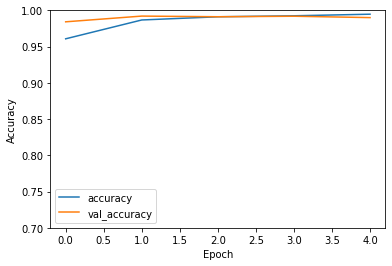

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

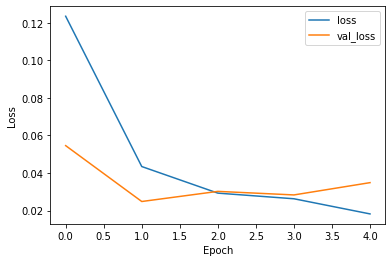

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

### Make Prediction

In [18]:
predicted = model.predict(X_test)

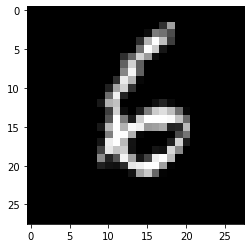

 Real label : 6
 Predicted label: 6


In [19]:
ind = 2000
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

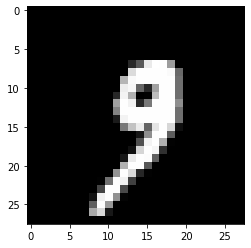

 Real label : 9
 Predicted label: 9


In [20]:
ind = 1000
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

In [21]:
labels_test_predicted = np.argmax(predicted, 1)

In [22]:
labels_test_predicted

array([7, 2, 1, ..., 4, 5, 6])

### Confusion Matrix of Predictions on the Test Set

In [25]:
# first argument to pd.crosstab goes to rows, second to columns
# row_0 : real labels
# col_0 : predicted labels
pd.crosstab(np.argmax(y_test,axis=1),labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,978,0,0,0,0,0,1,0,0,1
1,0,1130,1,4,0,0,0,0,0,0
2,0,0,1028,0,0,0,0,4,0,0
3,0,0,0,1007,0,1,0,1,1,0
4,0,1,1,0,963,0,1,2,0,14
5,0,0,0,11,0,879,1,0,0,1
6,5,2,0,0,1,3,947,0,0,0
7,0,2,5,0,0,0,0,1018,1,2
8,4,1,2,1,1,3,0,0,960,2


### Evaluate on Test Set

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03483847376307018
Test accuracy: 0.9900000095367432
